In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import Counter
from IPython.display import clear_output
import seaborn as sns

## Importing
[to top](#Table-of-Contents) 

In [2]:
pwd

u'/Users/innovation-sfi/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [3]:
df = pk.load(open('pickles_and_munged_csv/pre1950_cated_cumed_codes_as_ints_v1.pk', 'rb')); df

appln_auth,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,IE,IS,IT,JP,LU,NL,NO,SE,SU,US
pub_year,,,,,,,,,,,,,,,,,,,,,
1836,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1513, 1789], [1268, 1855], [1762, 1821], [24..."
1837,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5834, 5836], [4907, 5440], [799, 5648], [602..."
1838,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1537, 1774], [1154, 1208], [2724, 2748], [40..."
1839,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4212, 4231], [5078, 6180], [4915, 5001], [33..."
1840,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[2722, 2748], [1862, 1862], [1161, 5985], [48..."
1841,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5986, 6001], [3027, 5586], [2964, 3002], [18..."
1842,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4897, 5004], [5740, 5803], [5349, 5421], [11..."
1843,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1762, 1821], [1762, 1821], [5704, 5807], [57..."
1844,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[3764, 3825], [1520, 1764], [4641, 4643], [11..."


In [4]:
df.drop('SU', axis=1, inplace=True); df

appln_auth,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,GR,IE,IS,IT,JP,LU,NL,NO,SE,US
pub_year,,,,,,,,,,,,,,,,,,,,,
1836,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1513, 1789], [1268, 1855], [1762, 1821], [24..."
1837,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5834, 5836], [4907, 5440], [799, 5648], [602..."
1838,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1537, 1774], [1154, 1208], [2724, 2748], [40..."
1839,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4212, 4231], [5078, 6180], [4915, 5001], [33..."
1840,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[2722, 2748], [1862, 1862], [1161, 5985], [48..."
1841,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[5986, 6001], [3027, 5586], [2964, 3002], [18..."
1842,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[4897, 5004], [5740, 5803], [5349, 5421], [11..."
1843,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[1762, 1821], [1762, 1821], [5704, 5807], [57..."
1844,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],"[[3764, 3825], [1520, 1764], [4641, 4643], [11..."


In [5]:
print df.columns.values

['AT' 'AU' 'BE' 'CA' 'CH' 'DE' 'DK' 'ES' 'FI' 'FR' 'GB' 'GR' 'IE' 'IS' 'IT'
 'JP' 'LU' 'NL' 'NO' 'SE' 'US']


In [6]:
c = Counter(a=3, b=1)
d = Counter(a=1, b=2)
print sum((c & d).values())

c = Counter([(1,1),(1,1),(1,1),(1,2)])
print c
d = Counter([(1,1),(1,2),(1,2)])
print d
print sum((c & d).values())

2
Counter({(1, 1): 3, (1, 2): 1})
Counter({(1, 2): 2, (1, 1): 1})
2


In [13]:
test_year = 2010
df_test = pd.DataFrame()

for col1 in df:
    print '\n%s' % col1
    g1 = nx.Graph()
    for ls in df.loc[test_year,col1]:
        g1.add_edges_from(combinations(ls, 2))

    for col2 in df:
        print col2,
        g2 = nx.Graph()
        for ls in df.loc[test_year,col2]:
            g2.add_edges_from(combinations(ls, 2))
        if len(g1.edges()) == 0 or len(g2.edges()) == 0:
            df_test.loc[col1,col2] = -1
        else:
            lnk_c1 = Counter(g1.edges())
            lnk_c2 = Counter(g2.edges())
            num_shared_links = sum((lnk_c1 & lnk_c2).values())/float(sum((lnk_c1 | lnk_c2).values()))
            df_test.loc[col1,col2] = num_shared_links


AT
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
AU
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
BE
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
CA
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
CH
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
DE
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
DK
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
ES
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
FI
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
FR
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
GB
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
GR
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
IE
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
IS
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO SE US 
IT
AT AU BE CA CH DE DK ES FI FR GB GR IE IS IT JP LU NL NO S

In [48]:
df_test

NameError: name 'df_test' is not defined

In [12]:
pk.dump(df_test, open('pickles_and_munged_csv/pre1950_jaccard_unique_2010.pk', 'wb'))

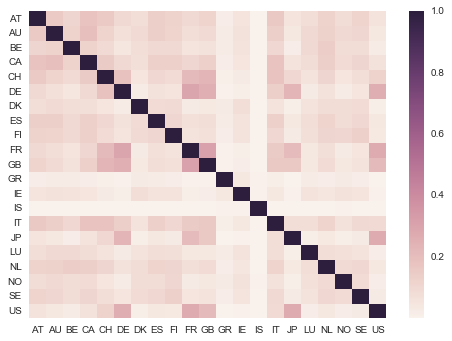

In [11]:
sns.heatmap(df_test)

In [5]:
def compute_jac_unique(df, year):
    
    # create dataframe to store similarities
    df_temp = pd.DataFrame()
    
    # for countries in dataset
    for col1 in df:
        print '\n%s' % col1 # to see progress
        
        # if the country1 has no patents then set similarity to -1 to denote this
        if not df.loc[year,col1]:
            for col2 in df:
                df_temp.loc[col1,col2] = -1
                df_temp.loc[col2,col1] = -1
            
        # else create graph for country1
        else:
            g1 = nx.Graph()
            for ls in df.loc[year,col1]:
                g1.add_edges_from(combinations(ls, 2))

            # for countries 'greater' than country1 in dataset 
            for col2 in df.loc[:, col1:]:
                
                # if countries are the same then set similarity to 1
                if col1 == col2:
                    print 'self',
                    df_temp.loc[col1,col2] = 1
                    
                # else if the country of not empty then calculate DeltaCon sim for country1 and country2
                elif df.loc[year,col2]:
                    print col2, # to see progress
                    
                    # create adjacency dataframe df2 (via nx.graph) for country2
                    g2 = nx.Graph()
                    for ls in df.loc[year,col2]:
                        g2.add_edges_from(combinations(ls, 2))    
                    
                    lnk_c1 = Counter(g1.edges())
                    lnk_c2 = Counter(g2.edges())
                    jac_indx = sum((lnk_c1 & lnk_c2).values())/float(sum((lnk_c1 | lnk_c2).values()))
                    df_temp.loc[col1,col2] = jac_indx
                    df_temp.loc[col2,col1] = jac_indx
    clear_output()
    return df_temp

In [7]:
jacs_2010 = compute_jac_unique(df,2010)

In [50]:
s_jacs = pd.Series()
for year in range(1900,2010,10):
    print year
    s_jacs.loc[year] = compute_jac_unique(df,year)

In [52]:
s_jacs.loc[1990]

,AT,AU,BE,CA,CH,DE,DK,ES,FI,FR,...,GR,IE,IS,IT,JP,LU,NL,NO,SE,US
AT,1.000000,0.155622,0.112818,0.172941,0.135263,0.096669,0.061138,0.108136,0.089622,0.090322,...,0.003762,0.029719,0.000440,0.145425,0.045711,0.079032,0.086153,0.058644,0.017210,0.055455
AU,0.155622,1.000000,0.123124,0.181907,0.099101,0.068337,0.074935,0.117166,0.090149,0.065925,...,0.005178,0.039408,0.000878,0.129172,0.029418,0.092512,0.095895,0.065564,0.020493,0.040762
BE,0.112818,0.123124,1.000000,0.127125,0.092926,0.054474,0.063630,0.093517,0.083124,0.058060,...,0.004934,0.029232,0.000783,0.112801,0.022539,0.096887,0.148544,0.061318,0.020223,0.030668
CA,0.172941,0.181907,0.127125,1.000000,0.128145,0.094519,0.052935,0.100170,0.088454,0.092162,...,0.003428,0.026302,0.000682,0.162537,0.041702,0.086195,0.096282,0.059212,0.016025,0.060511
CH,0.135263,0.099101,0.092926,0.128145,1.000000,0.211332,0.033688,0.071397,0.052673,0.232685,...,0.001687,0.012816,0.000219,0.154339,0.096594,0.060075,0.077510,0.030192,0.007563,0.147558
DE,0.096669,0.068337,0.054474,0.094519,0.211332,1.000000,0.020687,0.048377,0.035872,0.286984,...,0.000947,0.006908,0.000138,0.119995,0.177700,0.034777,0.046931,0.019919,0.004626,0.245451
DK,0.061138,0.074935,0.063630,0.052935,0.033688,0.020687,1.000000,0.073525,0.064662,0.019641,...,0.007884,0.045632,0.002033,0.049568,0.011525,0.045938,0.058413,0.063672,0.030673,0.011676
ES,0.108136,0.117166,0.093517,0.100170,0.071397,0.048377,0.073525,1.000000,0.076161,0.045987,...,0.006063,0.038866,0.000844,0.100097,0.026062,0.071549,0.074507,0.059954,0.020052,0.027924
FI,0.089622,0.090149,0.083124,0.088454,0.052673,0.035872,0.064662,0.076161,1.000000,0.033063,...,0.004629,0.032857,0.001229,0.073615,0.018508,0.066968,0.065735,0.087602,0.028984,0.020617
FR,0.090322,0.065925,0.058060,0.092162,0.232685,0.286984,0.019641,0.045987,0.033063,1.000000,...,0.000864,0.006550,0.000161,0.116804,0.164662,0.037510,0.048702,0.018947,0.004363,0.276143


In [53]:
#pk.dump(s_jacs, open('pickles_and_munged_csv/s_df_jaccard_unique_decades.pk', 'wb'))